# Stocks Multi Index

This is to understand multi index for stocks when you download multi stocks from Wiki and yahoo finance. You can download other stocks from different sources. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# Get S&P500 stock symbols, sectors, and subsectors from wikipedia
wiki_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies',header=0)[0]
symbols = list(wiki_table['Symbol'])

In [3]:
wiki_table

,Security,Symbol,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
0,3M Company,MMM,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,Abbott Laboratories,ABT,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,AbbVie Inc.,ABBV,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABIOMED Inc,ABMD,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,Accenture plc,ACN,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,Activision Blizzard,ATVI,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
6,Adobe Systems Inc,ADBE,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
7,Advanced Micro Devices Inc,AMD,reports,Information Technology,Semiconductors,"Sunnyvale, California",2017-03-20,2488,1969
8,Advance Auto Parts,AAP,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449,1932
9,AES Corp,AES,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981


In [4]:
sectors = list(wiki_table['GICS Sector'])
subsectors = list(wiki_table['GICS Sub Industry'])

In [5]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500 = pd.read_html(url,header=0)[0]

In [6]:
sp500

,Security,Symbol,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added[3][4],CIK,Founded
0,3M Company,MMM,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740,1902
1,Abbott Laboratories,ABT,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,AbbVie Inc.,ABBV,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABIOMED Inc,ABMD,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,Accenture plc,ACN,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
5,Activision Blizzard,ATVI,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
6,Adobe Systems Inc,ADBE,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
7,Advanced Micro Devices Inc,AMD,reports,Information Technology,Semiconductors,"Sunnyvale, California",2017-03-20,2488,1969
8,Advance Auto Parts,AAP,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449,1932
9,AES Corp,AES,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,874761,1981


In [7]:
output = {}
start = '2017-01-01'
end = '2017-12-31'
for ticker in sp500['Symbol'][:200]:
    try:
        output[ticker] = yf.download(ticker, start, end)['Adj Close']
    except:
        continue
df_sp500 = pd.DataFrame(output)
df_sp500.head()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,LNT,MMM,MO,RE,SCHW,STZ,T,XEC,XOM,XRAY
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,45.651554,45.464691,169.950409,112.620964,57.250782,79.790779,112.360001,37.304741,112.135040,103.480003,...,35.309452,169.468918,61.948483,206.672363,39.439106,151.139526,38.050098,137.524750,84.072838,57.721180
2017-01-04,46.250557,45.857471,171.345078,112.494911,58.058044,81.770821,115.739998,37.600883,112.404648,104.139999,...,35.523552,169.725876,62.150005,208.356049,40.439804,154.303955,37.828979,137.237381,83.147842,58.193813
2017-01-05,45.700653,45.062084,171.225510,113.066986,58.498356,80.824257,114.809998,37.925690,110.719650,105.910004,...,35.477016,169.145309,62.223289,208.336899,40.194534,143.326172,37.722847,138.832718,81.908348,57.435627
2017-01-06,47.124500,45.376312,168.984100,114.327484,58.516705,81.906044,115.419998,38.957420,111.980995,108.300003,...,35.188435,169.640244,62.498093,209.331818,40.449615,145.953415,36.971249,138.733627,81.862099,57.396240
2017-01-09,47.271793,46.230621,168.884491,115.374664,58.901985,82.562836,117.110001,38.919216,110.729271,108.570000,...,34.704357,168.726486,62.241611,207.562042,40.341698,146.764053,36.505978,138.089554,80.511604,57.573483


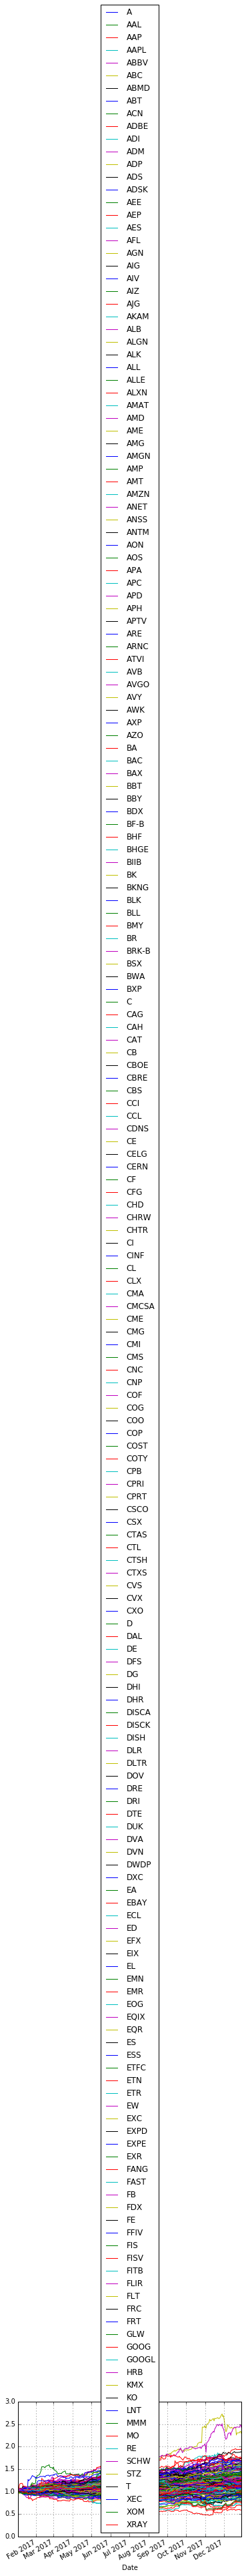

In [8]:
stock_return_sp500 = df_sp500.apply(lambda x: x / x[0])
stock_return_sp500.plot(grid = True)

In [9]:
stock_return_sp500.ix[-1,stock_return_sp500.ix[-1,:]>2]

ALGN    2.291564
ANET    2.427159
Name: 2017-12-29 00:00:00, dtype: float64

In [10]:
from IPython.display import clear_output

# Retrieve daily stock prices in 2017
start = '2017-01-01'
end = '2017-12-31'

df = yf.download(symbols, start, end) #stored as pandas df

[*********************100%***********************]  505 of 505 downloaded


In [11]:
df.head()

Open                                                \
                    A        AAL         AAP        AAPL       ABBV   
Date                                                                  
2017-01-03  45.930000  47.279999  170.779999  115.800003  62.919998   
2017-01-04  46.930000  46.630001  170.369995  115.849998  62.639999   
2017-01-05  47.049999  46.520000  170.869995  115.919998  63.380001   
2017-01-06  46.630001  45.849998  171.320007  116.779999  63.880001   
2017-01-09  48.009998  46.009998  170.059998  117.949997  63.799999   

                                                                       ...     \
                  ABC        ABMD        ABT         ACN        ADBE   ...      
Date                                                                   ...      
2017-01-03  78.510002  112.559998  38.630001  117.379997  103.430000   ...      
2017-01-04  82.599998  113.019997  39.060001  116.910004  103.739998   ...      
2017-01-05  84.379997  115.900002  39.240002  116.980003  104.129997   ...      
2017-01-06  83.529999  115.050003  39.700001  114.989998  105.980003   ...      
2017-01-09  84.599998  115.620003  40.790001  116.139999  107.959999   ...      

             Volume                                                          \
                XEL     XLNX       XOM     XRAY       XRX      XYL      YUM   
Date                                                                          
2017-01-03  2065100  4127000  10360600  1778000  16111900  1596700  4793400   
2017-01-04  2542600  3281700   9434200   978300   7687100  1703000  2835200   
2017-01-05  2611900  2198000  14443200  1114500   7060200  1846000  4040000   
2017-01-06  1707400  2381800  16518100  1169600   6171100  1561600  2863800   
2017-01-09  1840100  3548500  13762300   950600   3802700  1090400  1935900   

                                       
                ZBH     ZION      ZTS  
Date                                   
2017-01-03  1381100  2896200  3579700  
2017-01-04  1502800  1907500  3316300  
2017-01-05  1453900  2106000  2469100  
2017-01-06  1821000  2149100  2845800  
2017-01-09  1128100  2104900  2123300  

[5 rows x 3006 columns]

In [12]:
df.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [13]:
df.columns

MultiIndex(levels=[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBT', 'BBY', 'BDX', 'BEN', 'BF-B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BKNG', 'BLK', 'BLL', 'BMY', 'BR', 'BRK-B', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBRE', 'CBS', 'CCI', 'CCL', 'CDNS', 'CE', 'CELG', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CPRI', 'CPRT', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CV

In [14]:
df.columns.levels

FrozenList([['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBT', 'BBY', 'BDX', 'BEN', 'BF-B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BKNG', 'BLK', 'BLL', 'BMY', 'BR', 'BRK-B', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBRE', 'CBS', 'CCI', 'CCL', 'CDNS', 'CE', 'CELG', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', ...]])

In [15]:
Close = df['Adj Close'].unstack() 
Open = df['Open'].unstack()

In [16]:
Close.head()

   Date      
A  2017-01-03    45.651554
   2017-01-04    46.250557
   2017-01-05    45.700653
   2017-01-06    47.124500
   2017-01-09    47.271793
dtype: float64

In [17]:
Open

     Date      
A    2017-01-03    45.930000
     2017-01-04    46.930000
     2017-01-05    47.049999
     2017-01-06    46.630001
     2017-01-09    48.009998
     2017-01-10    48.340000
     2017-01-11    48.029999
     2017-01-12    48.900002
     2017-01-13    48.599998
     2017-01-17    48.369999
     2017-01-18    48.669998
     2017-01-19    48.040001
     2017-01-20    47.830002
     2017-01-23    47.599998
     2017-01-24    47.770000
     2017-01-25    47.599998
     2017-01-26    48.419998
     2017-01-27    48.320000
     2017-01-30    48.480000
     2017-01-31    48.040001
     2017-02-01    48.930000
     2017-02-02    48.880001
     2017-02-03    49.090000
     2017-02-06    49.130001
     2017-02-07    49.419998
     2017-02-08    49.369999
     2017-02-09    49.930000
     2017-02-10    50.509998
     2017-02-13    50.630001
     2017-02-14    50.240002
                     ...    
ZTS  2017-11-16    69.970001
     2017-11-17    70.239998
     2017-11-20    70.80000

In [18]:
Daily_Change = (Close - Open) * 100/ Open
Daily_Change

     Date      
A    2017-01-03   -0.606240
     2017-01-04   -1.447780
     2017-01-05   -2.867898
     2017-01-06    1.060474
     2017-01-09   -1.537607
     2017-01-10   -2.291028
     2017-01-11    0.690775
     2017-01-12   -2.566591
     2017-01-13   -1.621654
     2017-01-17   -1.904982
     2017-01-18   -2.650890
     2017-01-19   -2.621120
     2017-01-20   -2.234641
     2017-01-23   -2.236719
     2017-01-24   -2.666862
     2017-01-25   -0.132504
     2017-01-26   -2.310500
     2017-01-27   -1.132868
     2017-01-30   -3.444167
     2017-01-31    0.097479
     2017-02-01   -1.141236
     2017-02-02   -1.763337
     2017-02-03   -1.223400
     2017-02-06   -1.523682
     2017-02-07   -1.366374
     2017-02-08   -0.689644
     2017-02-09   -0.741486
     2017-02-10   -2.095108
     2017-02-13   -2.016840
     2017-02-14   -1.510322
                     ...   
ZTS  2017-11-16   -0.164549
     2017-11-17   -0.011590
     2017-11-20   -0.578261
     2017-11-21   -0.327507
    

In [19]:
stocks_df = Daily_Change.reset_index(level=[1,0])
stocks_df

,level_0,Date,0
0,A,2017-01-03,-0.606240
1,A,2017-01-04,-1.447780
2,A,2017-01-05,-2.867898
3,A,2017-01-06,1.060474
4,A,2017-01-09,-1.537607
5,A,2017-01-10,-2.291028
6,A,2017-01-11,0.690775
7,A,2017-01-12,-2.566591
8,A,2017-01-13,-1.621654
9,A,2017-01-17,-1.904982


In [20]:
s = stocks_df.stack()
u = stocks_df.unstack()

In [21]:
s.head()

0  level_0                      A
   Date       2017-01-03 00:00:00
   0                     -0.60624
1  level_0                      A
   Date       2017-01-04 00:00:00
dtype: object

In [22]:
u.head()

level_0  0    A
         1    A
         2    A
         3    A
         4    A
dtype: object

In [23]:
stocks_df = Daily_Change.rename_axis(['Symbols','Date'])
stocks_df

Symbols  Date      
A        2017-01-03   -0.606240
         2017-01-04   -1.447780
         2017-01-05   -2.867898
         2017-01-06    1.060474
         2017-01-09   -1.537607
         2017-01-10   -2.291028
         2017-01-11    0.690775
         2017-01-12   -2.566591
         2017-01-13   -1.621654
         2017-01-17   -1.904982
         2017-01-18   -2.650890
         2017-01-19   -2.621120
         2017-01-20   -2.234641
         2017-01-23   -2.236719
         2017-01-24   -2.666862
         2017-01-25   -0.132504
         2017-01-26   -2.310500
         2017-01-27   -1.132868
         2017-01-30   -3.444167
         2017-01-31    0.097479
         2017-02-01   -1.141236
         2017-02-02   -1.763337
         2017-02-03   -1.223400
         2017-02-06   -1.523682
         2017-02-07   -1.366374
         2017-02-08   -0.689644
         2017-02-09   -0.741486
         2017-02-10   -2.095108
         2017-02-13   -2.016840
         2017-02-14   -1.510322
                    

In [24]:
new_df = stocks_df.reset_index(level=[1])

In [25]:
new_df

,Date,0
Symbols,,
A,2017-01-03,-0.606240
A,2017-01-04,-1.447780
A,2017-01-05,-2.867898
A,2017-01-06,1.060474
A,2017-01-09,-1.537607
A,2017-01-10,-2.291028
A,2017-01-11,0.690775
A,2017-01-12,-2.566591
A,2017-01-13,-1.621654


In [26]:
a = new_df.rename(columns={0:'Daily_Change'})
a

,Date,Daily_Change
Symbols,,
A,2017-01-03,-0.606240
A,2017-01-04,-1.447780
A,2017-01-05,-2.867898
A,2017-01-06,1.060474
A,2017-01-09,-1.537607
A,2017-01-10,-2.291028
A,2017-01-11,0.690775
A,2017-01-12,-2.566591
A,2017-01-13,-1.621654


In [27]:
pivoted = pd.pivot_table(a, index='Symbols', columns='Date')

In [28]:
pivoted.head()

Daily_Change                                                         \
Date      2017-01-03 2017-01-04 2017-01-05 2017-01-06 2017-01-09 2017-01-10   
Symbols                                                                       
A          -0.606240  -1.447780  -2.867898   1.060474  -1.537607  -2.291028   
AAL        -3.839484  -1.656723  -3.133955  -1.033121   0.479511   1.288004   
AAP        -0.485765   0.572333   0.208062  -1.363476  -0.691231   0.339655   
AAPL       -2.745284  -2.896061  -2.461191  -2.100116  -2.183411  -2.760779   
ABBV       -9.010197  -7.314743  -7.702185  -8.395892  -7.677138  -8.238006   

                                                       ...                 \
Date    2017-01-11 2017-01-12 2017-01-13 2017-01-17    ...     2017-12-15   
Symbols                                                ...                  
A         0.690775  -2.566591  -1.621654  -1.904982    ...      -0.237184   
AAL      -3.099061  -2.954144  -2.843985  -3.476516    ...      -0.195033   
AAP      -0.426694   0.803649  -0.169455  -1.146466    ...      -0.368146   
AAPL     -2.213584  -2.752935  -3.095334  -1.678221    ...      -1.286192   
ABBV    -10.615866  -6.563444  -6.374448  -7.175998    ...      -4.340193   

                                                                           \
Date    2017-12-18 2017-12-19 2017-12-20 2017-12-21 2017-12-22 2017-12-26   
Symbols                                                                     
A        -1.472207  -1.413762  -1.735027  -1.122643  -1.225287  -1.225420   
AAL      -0.493551  -1.264467  -0.285168   0.238901  -1.201578  -0.011389   
AAP       1.119151  -2.878482  -1.665905   1.472835  -0.258159   0.979953   
AAPL     -0.611538  -1.754922  -1.772068  -1.003959  -1.292988  -1.611776   
ABBV     -4.413136  -5.402390  -5.356566  -4.831860  -4.579282  -5.306840   

                                          
Date    2017-12-27 2017-12-28 2017-12-29  
Symbols                                   
A        -1.004886  -1.122632  -1.696382  
AAL      -1.707669  -0.938482  -1.694222  
AAP      -2.082678  -0.318836  -0.328846  
AAPL     -1.189513  -1.433015  -2.224426  
ABBV     -4.569112  -5.306683  -6.304776  

[5 rows x 251 columns]